# Proyek Analisis Data: [Air Quality Dongsi]
- **Nama:** [Fitri Fitriah]
- **Email:** [fitrifitriah.91.13@gmail.com / m123b4kx1537@bangkit.academy]
- **ID Dicoding:** [fitri_fitriah]

## Menentukan Pertanyaan Bisnis

- How is the air quality in Dongsi area in the last few month based on the diameter of air particles?
- How is the correlation between PM2.5 and PM10 pollution parameters and temperature changes in recent months?
- What year did PM2.5 concentrations have the highest values?

## Import All Packages/Library

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [133]:
dongsi_df = pd.read_csv("/content/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi




> **Insight:**
- read the csv file on colab directory and print it



In [134]:
focused_df = dongsi_df[['month', 'PM2.5', 'PM10', 'TEMP']]
focused_df.head()

,month,PM2.5,PM10,TEMP
0,3,9.0,9.0,-0.5
1,3,4.0,4.0,-0.7
2,3,7.0,7.0,-1.2
3,3,3.0,3.0,-1.4
4,3,3.0,3.0,-1.9


In [135]:
#create date coloumn to get time
years = dongsi_df['year'].values
months = dongsi_df['month'].values
days = dongsi_df['day'].values
hours = dongsi_df['hour'].values
fullDate = []

for i in range(dongsi_df.shape[0]):
    date = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    fullDate.append(date)

dates = pd.to_datetime(fullDate)
dates = pd.DataFrame(dates,columns=['date'])
dongsi_df = pd.concat([dates,dongsi_df],axis=1)

dongsi_df.head()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013-03-01 03:00:00,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


### Assessing Data

In [136]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35064 non-null  datetime64[ns]
 1   No       35064 non-null  int64         
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    34314 non-null  float64       
 7   PM10     34511 non-null  float64       
 8   SO2      34401 non-null  float64       
 9   NO2      33463 non-null  float64       
 10  CO       31867 non-null  float64       
 11  O3       34400 non-null  float64       
 12  TEMP     35044 non-null  float64       
 13  PRES     35044 non-null  float64       
 14  DEWP     35044 non-null  float64       
 15  RAIN     35044 non-null  float64       
 16  wd       34986 non-null  object        
 17  WSPM     35050 non-null  float6

In [137]:
#checking there is NaN or Null values
dongsi_df.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601


In [138]:
print("sum of duplicated values: ", dongsi_df.duplicated().sum())

sum of duplicated values:  0


In [139]:
dongsi_df.describe()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000
std,NaN,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368


In [140]:
#calculate total of unique value (not duplicated)
dongsi_df.nunique()

,0
date,35064
No,35064
year,5
month,12
day,31
hour,24
PM2.5,582
PM10,666
SO2,392
NO2,701




> **Insight:**


  *   There is no duplicated data
  *   There is a lot of null values
  *   Each parameter have unique values





### Cleaning Data

duplicate data

In [141]:
dongsi_df.duplicated().sum()

0

In [142]:
print("duplicate value: ", dongsi_df.duplicated().sum())

duplicate value:  0


missing values

In [143]:
dongsi_df.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601


In [144]:
# check any NaN
dongsi_df[dongsi_df[['PM2.5', 'PM10','TEMP']].isna().any(axis=1)]

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
204,2013-03-09 12:00:00,205,2013,3,9,12,77.0,NaN,8.0,23.0,400.0,99.0000,11.7,1005.8,-16.8,0.0,N,9.2,Dongsi
616,2013-03-26 16:00:00,617,2013,3,26,16,NaN,NaN,NaN,NaN,NaN,NaN,13.5,1005.3,-2.5,0.0,WSW,4.2,Dongsi
1092,2013-04-15 12:00:00,1093,2013,4,15,12,NaN,168.0,79.0,50.0,1600.0,NaN,17.9,998.5,-2.4,0.0,SSW,3.0,Dongsi
1642,2013-05-08 10:00:00,1643,2013,5,8,10,NaN,169.0,93.0,64.0,NaN,76.4694,22.1,1011.0,9.6,0.0,ENE,1.9,Dongsi
1643,2013-05-08 11:00:00,1644,2013,5,8,11,NaN,214.0,89.0,73.0,2100.0,72.0000,22.7,1010.5,10.2,0.0,SE,0.8,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34913,2017-02-22 17:00:00,34914,2017,2,22,17,NaN,6.0,10.0,44.0,1400.0,57.0000,6.8,1017.6,-9.2,0.0,NNW,2.6,Dongsi
35030,2017-02-27 14:00:00,35031,2017,2,27,14,NaN,NaN,NaN,NaN,NaN,NaN,14.2,1014.7,-6.7,0.0,SW,2.1,Dongsi
35031,2017-02-27 15:00:00,35032,2017,2,27,15,NaN,NaN,NaN,NaN,NaN,NaN,15.7,1014.1,-7.2,0.0,SW,2.7,Dongsi
35032,2017-02-27 16:00:00,35033,2017,2,27,16,NaN,NaN,NaN,NaN,NaN,NaN,15.9,1014.0,-9.9,0.0,SW,2.9,Dongsi


In [145]:
#because there is NaN values, so we replace it with means data for NaN values
dongsi_df = dongsi_df.fillna({'PM2.5': 86.19, 'PM10': 110.33, 'TEMP': 13.67})


In [146]:
#checking whether there are still null values
dongsi_df.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,663
NO2,1601




> **Insight:**
- replace null values data with mean that we get from assesing data steps
- check is there any values left



## Exploratory Data Analysis (EDA)

### Explore dongsi_df

In [147]:
dongsi_df.sample(5)

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
11888,2014-07-09 08:00:00,11889,2014,7,9,8,20.0,20.0,4.0,59.0,600.0,10.0,25.800,1002.4,14.9,0.0,NW,0.6,Dongsi
31433,2016-09-30 17:00:00,31434,2016,9,30,17,116.0,158.0,18.0,44.0,900.0,182.0,23.300,1009.0,9.3,0.0,SSW,1.7,Dongsi
22581,2015-09-27 21:00:00,22582,2015,9,27,21,63.0,134.0,4.0,88.0,1300.0,39.0,21.000,1011.5,15.1,0.0,NE,0.2,Dongsi
24785,2015-12-28 17:00:00,24786,2015,12,28,17,103.0,150.0,26.0,94.0,2000.0,3.0,1.700,1028.7,-9.0,0.0,WSW,1.8,Dongsi
33910,2017-01-11 22:00:00,33911,2017,1,11,22,34.0,56.0,14.0,72.0,900.0,20.0,-0.175,1020.0,-10.7,0.0,SE,1.0,Dongsi


In [148]:
#check uniq of year, PM2.5, PM10, and TEMP
dongsi_df.year.is_unique
# dongsi_df['PM2.5'].is_unique
# dongsi_df.PM10.is_unique
# dongsi_df.TEMP.is_unique

False

In [149]:
dongsi_df.groupby("year").mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3672.5,7.500000,15.803922,11.5,86.925677,105.018075,24.051632,57.656467,1338.296558,63.596872,15.963657,1009.828758,5.152369,0.057979,1.803813
2014,11724.5,6.526027,15.720548,11.5,87.455437,116.939056,23.844470,55.847246,1368.141388,57.246473,13.881153,1012.534224,2.604429,0.054212,1.820046
2015,20484.5,6.526027,15.720548,11.5,87.326373,111.840180,15.190444,50.342847,1335.716753,55.784312,13.432386,1012.789680,2.692327,0.072882,1.934768
2016,29256.5,6.513661,15.756831,11.5,80.465627,103.282104,11.541863,51.103106,1239.759036,56.105742,13.863386,1012.824537,2.286966,0.079765,1.859346
2017,34356.5,1.474576,15.288136,11.5,103.130438,131.535975,20.429185,57.987840,1581.476122,39.505739,0.775002,1023.598992,-13.191815,0.003132,1.960114


In [150]:
dongsi_df.groupby("PM2.5").mean(numeric_only=True)

,No,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,,,,,,,,,,,,,,,
3.0,14979.086323,2014.242152,8.135650,13.765695,10.480942,23.080717,5.937233,22.369745,416.111374,58.810936,10.192887,1017.296170,-7.965359,0.017713,2.966592
4.0,17054.925795,2014.533569,7.459364,14.353357,10.872792,21.406360,4.868789,18.834916,338.661710,58.761993,8.657155,1018.395053,-10.236042,0.006360,3.113781
4.3,15810.000000,2014.000000,12.000000,19.000000,17.000000,29.000000,4.000000,11.000000,200.000000,74.000000,2.000000,1024.000000,-19.300000,0.000000,4.400000
4.4,14688.000000,2014.000000,11.000000,2.000000,23.000000,22.200000,3.900000,52.600000,600.000000,11.100000,4.000000,1015.000000,-4.700000,0.000000,0.700000
5.0,18854.682353,2014.764706,7.135294,14.717647,11.070588,22.870588,4.925816,18.517600,366.358025,60.117004,8.456250,1018.860000,-10.064118,0.009706,3.199412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681.0,34301.000000,2017.000000,1.000000,28.000000,4.000000,915.000000,159.000000,75.000000,300.000000,2.000000,-3.500000,1019.000000,-13.500000,0.000000,1.800000
684.0,8423.000000,2014.000000,2.000000,14.000000,22.000000,760.000000,230.000000,NaN,4500.000000,59.000000,-4.200000,1020.600000,-7.000000,0.000000,0.700000
685.0,24117.500000,2015.000000,11.000000,30.000000,20.500000,690.000000,30.000000,174.000000,9450.000000,5.000000,-1.550000,1019.350000,-1.550000,0.000000,0.800000


In [151]:
dongsi_df.groupby("PM10").mean(numeric_only=True)

,No,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM10,,,,,,,,,,,,,,,
2.0,3964.375000,2013.000000,8.125000,9.000000,9.375000,17.625000,5.944900,21.189371,600.000000,92.980300,23.350000,1004.200000,11.525000,0.012500,1.762500
3.0,11342.244186,2013.802326,8.406977,14.895349,11.848837,5.976744,8.902933,29.868380,480.743590,65.439151,19.906977,1013.630233,3.423256,0.017442,2.116279
4.0,8607.680000,2013.560000,7.600000,14.200000,8.920000,7.920000,4.085024,24.347328,333.333333,65.730400,21.028000,1008.536000,5.636000,0.008000,2.260000
5.0,14689.769231,2014.320955,6.843501,12.493369,10.000000,11.254244,6.108062,21.915608,410.326087,61.183340,11.313218,1016.261273,-5.941645,0.032361,2.648541
6.0,11846.980247,2013.985185,6.948148,13.071605,9.891358,13.994321,9.275623,26.836104,543.988270,54.261591,8.893405,1019.550988,-7.617037,0.087901,2.513333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888.0,26402.000000,2016.000000,3.000000,5.000000,1.000000,135.000000,2.000000,15.000000,500.000000,60.000000,10.000000,1015.200000,-8.200000,0.000000,3.700000
891.0,26974.000000,2016.000000,3.000000,28.000000,21.000000,60.000000,2.000000,14.000000,200.000000,79.000000,19.000000,1008.500000,-5.200000,0.000000,4.300000
907.0,34299.000000,2017.000000,1.000000,28.000000,2.000000,646.000000,143.000000,72.000000,2400.000000,2.000000,-2.975000,1020.000000,-14.900000,0.000000,1.400000


In [152]:
dongsi_df.groupby("TEMP").mean(numeric_only=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,PRES,DEWP,RAIN,WSPM
TEMP,,,,,,,,,,,,,,,
-16.8,25401.5,2016.0,1.0,23.0,8.5,6.00,12.00,3.5,10.5,500.0,62.5,1040.5,-34.8,0.0,4.8
-16.3,25400.0,2016.0,1.0,23.0,7.0,5.00,11.00,2.0,9.0,400.0,63.0,1039.5,-34.1,0.0,2.9
-16.2,25413.0,2016.0,1.0,23.0,20.0,8.00,85.00,2.0,11.0,600.0,61.0,1041.0,-32.1,0.0,3.2
-16.1,25414.0,2016.0,1.0,23.0,21.0,9.00,145.00,2.0,10.0,600.0,60.0,1041.4,-32.1,0.0,4.4
-16.0,25416.0,2016.0,1.0,23.0,23.0,5.00,95.00,2.0,13.0,600.0,57.0,1040.7,-32.4,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38.8,20753.0,2015.0,7.0,13.0,16.0,46.00,91.00,3.0,21.0,500.0,306.0,991.8,13.3,0.0,2.3
39.6,10910.0,2014.0,5.0,29.0,13.0,15.00,63.00,9.0,28.0,700.0,186.0,992.5,3.7,0.0,2.0
40.0,10913.0,2014.0,5.0,29.0,16.0,86.19,110.33,2.0,NaN,400.0,140.0,992.7,5.2,0.0,2.9


In [153]:
dongsi_df.corr(numeric_only = True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.003032,0.003703,-0.244322,-0.037048,0.007302,-0.094445,-0.119018,0.172940,-0.088871,0.008396,-0.003583
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.006831,0.004563,-0.193675,-0.062101,-0.011209,-0.064482,-0.148766,0.173713,-0.151824,0.004372,0.027663
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.015151,-0.005911,-0.187721,0.108640,0.071386,-0.113223,0.132503,-0.021172,0.265387,0.016551,-0.126916
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.002489,0.023555,-0.000101,-0.005965,-0.012875,-0.004705,0.015847,0.018167,0.020019,-0.006632,-0.009686
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.001811,0.027577,-0.010701,-0.074505,-0.037249,0.286357,0.142074,-0.039081,-0.019910,0.005099,0.156612
PM2.5,-0.003032,-6.831105e-03,1.515111e-02,2.489424e-03,-1.811393e-03,1.000000,0.887073,0.545100,0.689783,0.799669,-0.137181,-0.137235,-0.005948,0.127820,-0.018987,-0.298790
PM10,0.003703,4.562641e-03,-5.910694e-03,2.355490e-02,2.757692e-02,0.887073,1.000000,0.492239,0.657217,0.718571,-0.126762,-0.132498,-0.016029,0.061775,-0.030952,-0.197379
SO2,-0.244322,-1.936746e-01,-1.877213e-01,-1.005245e-04,-1.070146e-02,0.545100,0.492239,1.000000,0.506688,0.582002,-0.157093,-0.338909,0.205729,-0.228545,-0.045426,-0.168864
NO2,-0.037048,-6.210086e-02,1.086399e-01,-5.964988e-03,-7.450457e-02,0.689783,0.657217,0.506688,1.000000,0.712110,-0.464226,-0.257110,0.088765,0.054902,-0.043926,-0.497729
CO,0.007302,-1.120865e-02,7.138613e-02,-1.287543e-02,-3.724867e-02,0.799669,0.718571,0.582002,0.712110,1.000000,-0.294112,-0.306886,0.134724,-0.002951,-0.013202,-0.346954




> **Insight:**
- grouping using groupby() function
- make a correlation between numeric values



## Visualization & Explanatory Analysis

### Question 1: How is the air quality in Dongsi area in every month on the diameter of air particles?

In [154]:
dongsi_df.sample(5)

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
34643,2017-02-11 11:00:00,34644,2017,2,11,11,31.0,41.0,13.0000,34.0000,900.0,47.0,4.2,1025.5,-18.1,0.0,ENE,1.9,Dongsi
3288,2013-07-16 00:00:00,3289,2013,7,16,0,69.0,38.0,6.5688,60.7688,NaN,2.0,23.7,991.9,23.7,0.0,N,0.0,Dongsi
23575,2015-11-08 07:00:00,23576,2015,11,8,7,31.0,31.0,4.0000,36.0000,500.0,28.0,2.3,1021.9,-1.5,0.0,NE,1.1,Dongsi
15094,2014-11-19 22:00:00,15095,2014,11,19,22,291.0,402.0,45.0000,143.0000,4600.0,3.0,2.0,1017.0,0.1,0.0,E,0.8,Dongsi
11376,2014-06-18 00:00:00,11377,2014,6,18,0,63.0,63.0,2.0000,74.0000,1100.0,26.0,18.3,999.5,17.7,0.0,SSE,0.6,Dongsi


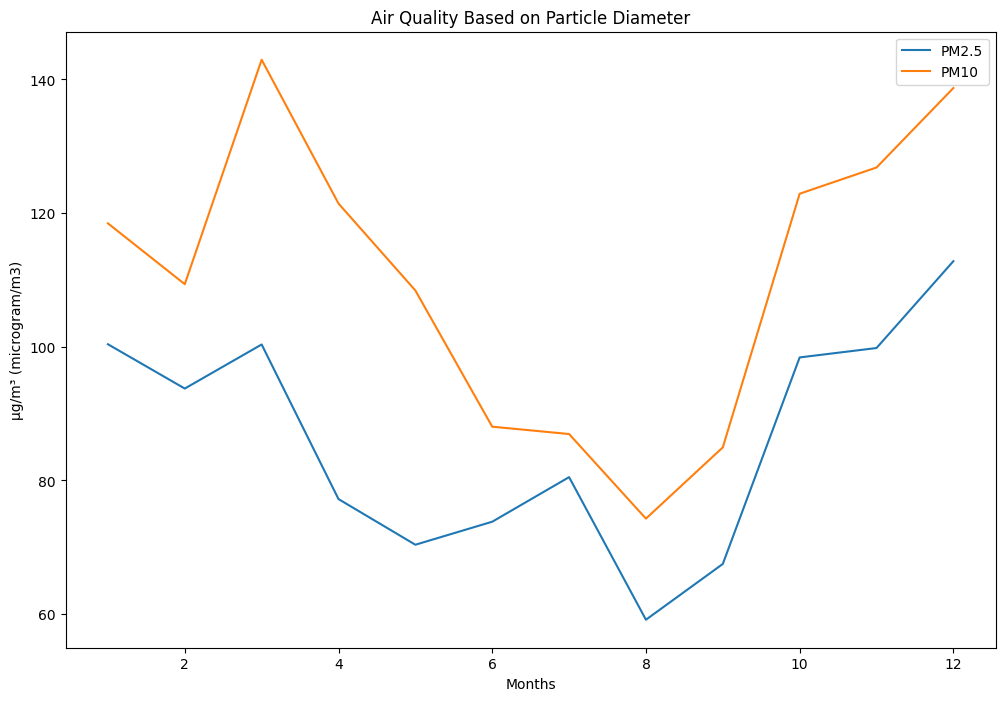

In [155]:
Months = dongsi_df.groupby("month").mean(numeric_only=True)
plt.figure(figsize=(12,8))

plt.plot(Months.index, Months["PM2.5"], label="PM2.5")
plt.plot(Months.index, Months["PM10"], label="PM10")

plt.xlabel("Months")
plt.ylabel("µg/m³ (microgram/m3)")
plt.title("Air Quality Based on Particle Diameter")
plt.legend()
plt.show()



> so if based on particle diameter, PM10 has the largest number of particles compared to PM2.5. And in the 8th month there was a decrease in PM2.5 and PM10 pollution. This indicates that the air quality based on particle diameter in the 8th month was good. However, in the 3rd and 10th months there was an increase in pollution.


### Question 2: How is the correlation between PM2.5 and PM10 pollution parameters and temperature changes?

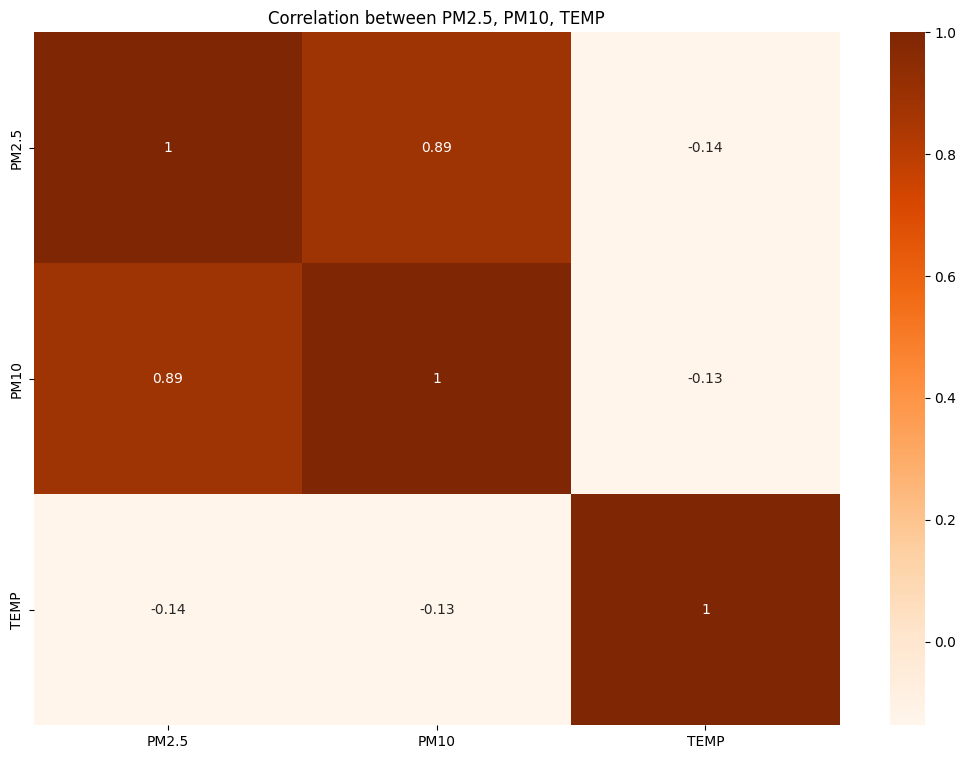

In [156]:
correlation_matrix = dongsi_df[['PM2.5', 'PM10', 'TEMP']].corr()

# show heatmap
plt.figure(figsize=(13, 9))
sn.heatmap(correlation_matrix, cmap='Oranges', annot=True)
plt.title("Correlation between PM2.5, PM10, TEMP")
plt.show()



> There are several positive and negative correlations that occur based on the table above between PM2.5, PM10, and temperature changes, which means that pollution concentrations change as temperature changes.



**Insight:**
- using seaborn to generate plot
- using heatmap to show correlation

### Question 3: What year did PM2.5 concentrations have the highest values?

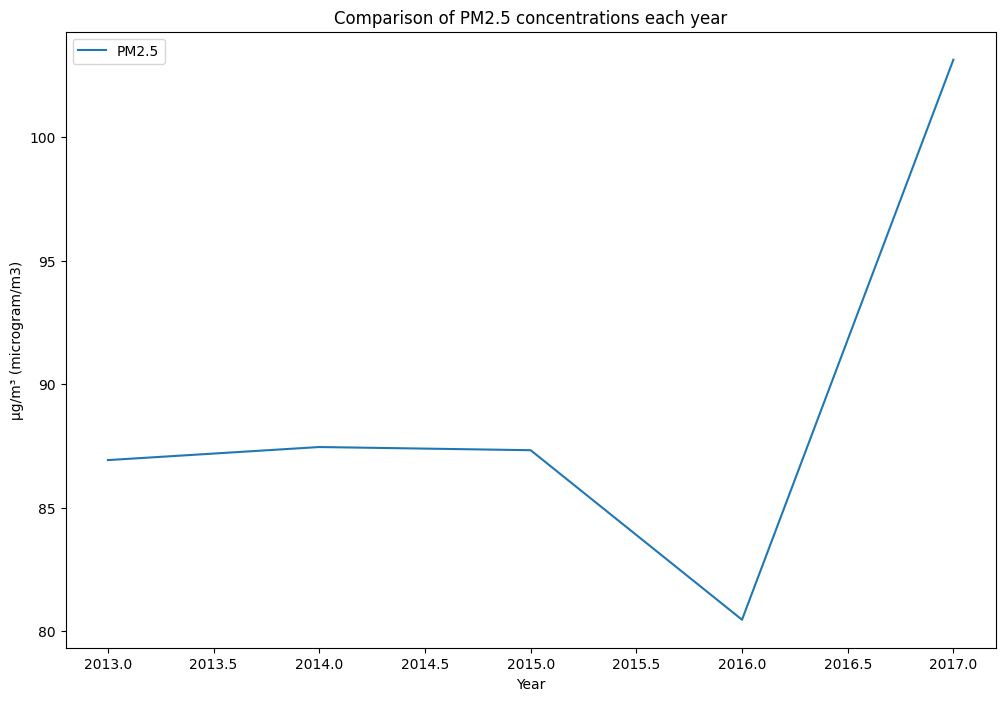

In [157]:
years = dongsi_df.groupby("year").mean(numeric_only=True)


plt.figure(figsize=(12,8))
plt.plot(years.index, years["PM2.5"], label="PM2.5")
plt.xlabel("Year")
plt.ylabel("µg/m³ (microgram/m3)")
plt.title("Comparison of PM2.5 concentrations each year")
plt.legend()
plt.show()



> The highest concentration of PM2.5 occurred in 2017



## Conclusion

- Conclusion question 1
  
    1. PM10 consistently has a higher concentration compared to PM2.5 throughout the year, indicating that larger particles are more prevalent.
    2. The lowest point for both PM2.5 and PM10 occurs in the 8th month, which suggests better air quality during this period.
    3. However, pollution levels increase significantly around the 3rd and 10th months, indicating worse air quality during these months, especially when PM10 reaches its peak.

- Conclusion question 2
    1. Pollutan concentration change as temperature changes
    2. there is positive and negative correlation

- Conclusion question 3
    
    The highest concentration of PM2.5 occurred in 2017 which was arround more than 100 µg/m³

In [158]:
dongsi_df.to_csv("dongsi.csv", index=False)